In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [2]:
dataset_url = 'https://raw.githubusercontent.com/LozinskiMatthew/Life-Expectancy-Model/main/LifeExpectancyData.csv'
pd.set_option('display.max_columns', None)
dataset = pd.read_csv(dataset_url)
print(dataset.head(10).to_string())

       Country  Year      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  2015  Developing              65.0            263.0             62     0.01               71.279624         65.0      1154   19.1                  83    6.0               8.16         65.0        0.1  584.259210  33736494.0                   17.2                 17.3                            0.479       10.1
1  Afghanistan  2014  Developing              59.9            271.0             64     0.01               73.523582         62.0       492   18.6                  86   58.0               8.18         62.0        0.1  612.696514    327582.0                   17.5                 17.5                            0.476       10.0
2  Afghanistan  

In [3]:
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Analysis:

In [4]:
dataset[dataset['Country'] == 'Democratic People(\')s Republic of Korea']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
pd.set_option('display.max_columns', None)
print(dataset[dataset['Life expectancy '] > 77].count())
dataset[dataset['Life expectancy '] < 68]

Country                            564
Year                               564
Status                             564
Life expectancy                    564
Adult Mortality                    564
infant deaths                      564
Alcohol                            525
percentage expenditure             564
Hepatitis B                        394
Measles                            564
 BMI                               564
under-five deaths                  564
Polio                              564
Total expenditure                  521
Diphtheria                         564
 HIV/AIDS                          564
GDP                                505
Population                         444
 thinness  1-19 years              564
 thinness 5-9 years                564
Income composition of resources    513
Schooling                          513
dtype: int64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**''''''**Data notes to do: **

1.   Clean the data
2.   Fill/drop the missing values in the future



In [7]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
dataset.dropna(inplace=True, axis=0, subset=['Life expectancy '])
dataset.isnull().sum()
dataset.reset_index(drop=True, inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [10]:
'''
moddf = dataset.copy()
for row in moddf.index():
  row_country = moddf.loc[row, 'Country']
  moddf = dataset[row].fillna(value=moddf[row_country].mean())
moddf.isnull().sum()
'''
'''
for country_mean in country_means:
  if country_mean != False:
    print(country_mean)\


    moddf = dataset.copy()
country_means = moddf.groupby('Country')['Alcohol'].mean()
print(country_means[country_means.isnull()])
dataset[dataset['Country'] == 'South Sudan']
'''

"\nfor country_mean in country_means:\n  if country_mean != False:\n    print(country_mean)\n\n    moddf = dataset.copy()\ncountry_means = moddf.groupby('Country')['Alcohol'].mean()\nprint(country_means[country_means.isnull()])\ndataset[dataset['Country'] == 'South Sudan']\n"

In [11]:
dataset[dataset['Country'] == 'South Africa']['Alcohol'].mean()
# The idea is pretty simple, from the external sources I'll aquire the weighed average for values not in the context, e.t. in this case South Sudan
# We can assume that Sudan alcohol consuption is 0.0
dataset.loc[dataset['Country'] == 'South Sudan', 'Alcohol'] = 0.0

In [12]:
dataset[dataset['Country'] == 'South Sudan']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2400,South Sudan,2015,Developing,57.3,332.0,26,0.0,0.000000,31.0,878,NaN,39,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2401,South Sudan,2014,Developing,56.6,343.0,26,0.0,46.074469,NaN,441,NaN,39,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2402,South Sudan,2013,Developing,56.4,345.0,26,0.0,47.444530,NaN,525,NaN,40,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2403,South Sudan,2012,Developing,56.0,347.0,26,0.0,38.338232,NaN,1952,NaN,40,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2404,South Sudan,2011,Developing,55.4,355.0,27,0.0,0.000000,NaN,1256,NaN,41,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2405,South Sudan,2010,Developing,55.0,359.0,27,0.0,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2406,South Sudan,2009,Developing,54.3,369.0,27,0.0,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2407,South Sudan,2008,Developing,53.6,377.0,27,0.0,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2408,South Sudan,2007,Developing,53.1,381.0,27,0.0,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2409,South Sudan,2006,Developing,52.5,383.0,28,0.0,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


In [13]:
dataset[dataset['Status'] == 'Developing']['Life expectancy '].mean()

67.11146523178807

In [14]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [15]:
# Cell on purpose in order to test on dummy dataset e.t. copy of the main none
'''
moddf = dataset.copy()
country_means = moddf.groupby('Country')['Alcohol'].mean()
for row in moddf.index:
  if pd.isnull(moddf.loc[row, 'Alcohol']):
    country = moddf.loc[row, 'Country']
    moddf.loc[row, 'Alcohol'] = country_means[country]
moddf.isnull().sum()
'''

"\nmoddf = dataset.copy()\ncountry_means = moddf.groupby('Country')['Alcohol'].mean()\nfor row in moddf.index:\n  if pd.isnull(moddf.loc[row, 'Alcohol']):\n    country = moddf.loc[row, 'Country']\n    moddf.loc[row, 'Alcohol'] = country_means[country]\nmoddf.isnull().sum()\n"

In [16]:
country_means = dataset.groupby('Country')['Alcohol'].mean()
for row in dataset.index:
  if pd.isnull(dataset.loc[row, 'Alcohol']):
    country = dataset.loc[row, 'Country']
    dataset.loc[row, 'Alcohol'] = country_means[country]
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [17]:
dataset.dtypes
# Note -:- I will need to HotEncode the Country value, rest stays the same, ?normalization/standardization needed? Most likely standardize it, I will need to visualize this data!

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [18]:
dataset[:20]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [19]:
hepatitis_mean = dataset.groupby('Country')['Hepatitis B'].mean()
for row in dataset.index:
  if pd.isnull(dataset.loc[row, 'Hepatitis B']):
    country = dataset.loc[row, 'Country']
    dataset.loc[row, 'Hepatitis B'] = hepatitis_mean[country]
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [20]:
hepa_mean = dataset.groupby('Country')['Hepatitis B'].mean()
h1 = hepa_mean[hepa_mean.isna()]
nan_countries = h1.index
len(dataset[dataset['Country'].isin(nan_countries)])

144

(array([ 1.,  0.,  4.,  4.,  6., 15., 22., 30., 36., 56.]),
 array([ 9.    , 17.9875, 26.975 , 35.9625, 44.95  , 53.9375, 62.925 ,
        71.9125, 80.9   , 89.8875, 98.875 ]),
 <BarContainer object of 10 artists>)

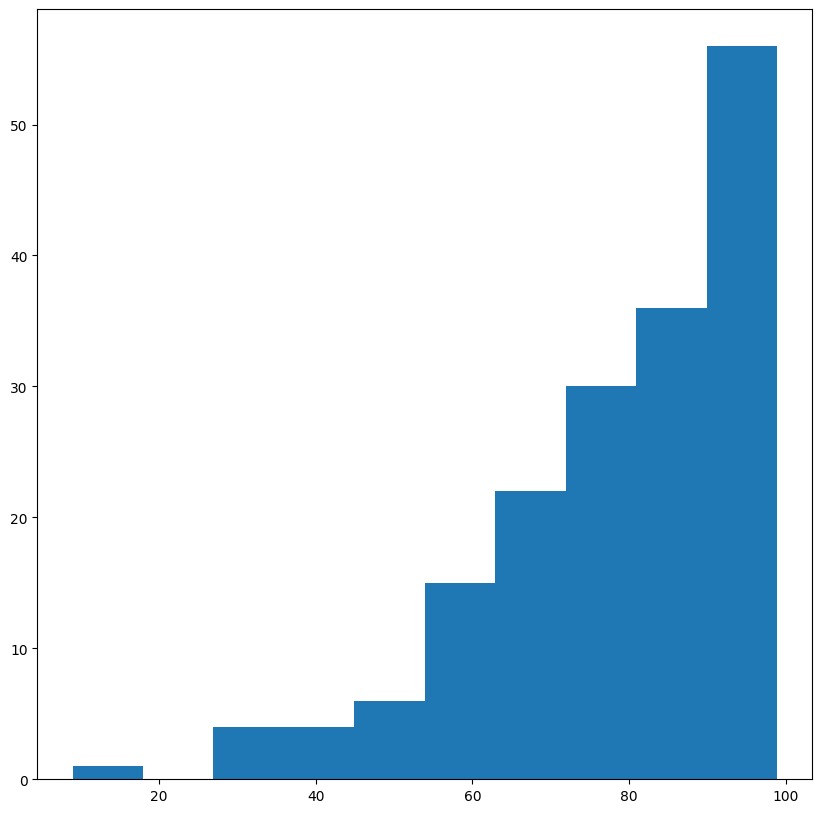

In [21]:
fig, ax = plt.subplots(
    figsize=(10, 10)
)
ax.hist(hepa_mean)

In [22]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [23]:
dataset['Hepatitis B'].isnull().sum()

144

In [24]:
dataset['Hepatitis B'].fillna(value=dataset['Hepatitis B'].mean(), inplace=True)

In [25]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [26]:
dataset[(dataset[' BMI '] <= 5) & (dataset['Status'] == 'Developed')]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2312,Singapore,2007,Developed,81.1,65.0,0,1.60,3082.973535,96.0,15,3.9,0,97.0,3.46,97.0,0.1,39223.58187,NaN,2.1,2.0,0.873,14.1
2313,Singapore,2006,Developed,87.0,66.0,0,1.55,2639.376955,95.0,23,3.5,0,95.0,3.66,95.0,0.1,33579.85948,NaN,2.1,2.0,0.839,13.9
2314,Singapore,2005,Developed,82.0,69.0,0,1.49,2356.731479,96.0,33,3.2,0,96.0,3.74,96.0,0.1,29869.85398,NaN,2.1,2.0,0.821,12.6


In [27]:
# BM = dataset['Country'].unique()
BM = dataset.groupby('Country')[' BMI '].mean()
cnt = 0
for country in BM.index:
  if pd.isnull(BM.loc[country]):
    print(country)
    cnt += 1
print(cnt)

South Sudan
Sudan
2


In [28]:
# dataset[' BMI '].filllna(value=dataset['BMI'].mean(), inplace=True)
BMI_by_country = dataset.groupby('Country')[' BMI '].mean()
for row in dataset.index:
  if pd.isnull(dataset.loc[row, ' BMI ']):
    country = dataset.loc[row, 'Country']
    dataset.loc[row, ' BMI '] = BMI_by_country[country]
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [29]:
dataset[(dataset['Country'] == 'South Sudan') | (dataset['Country'] == 'Sudan')]['Country']

2400    South Sudan
2401    South Sudan
2402    South Sudan
2403    South Sudan
2404    South Sudan
2405    South Sudan
2406    South Sudan
2407    South Sudan
2408    South Sudan
2409    South Sudan
2410    South Sudan
2411    South Sudan
2412    South Sudan
2413    South Sudan
2414    South Sudan
2415    South Sudan
2448          Sudan
2449          Sudan
2450          Sudan
2451          Sudan
2452          Sudan
2453          Sudan
2454          Sudan
2455          Sudan
2456          Sudan
2457          Sudan
2458          Sudan
2459          Sudan
2460          Sudan
2461          Sudan
2462          Sudan
2463          Sudan
Name: Country, dtype: object

In [30]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [31]:
#Thailand has a similiar stats, to a Sudan, and South Sudan is the neighbour of the Sudan, therefore I will assume both the same mean in terms of BMI
#Thus having the mean of Thailand, will solve the lack of mean in Sudan. (checked ion site worldpopulationreview.com)

In [32]:
'''
for row in dataset.index:
  if pd.isnull(dataset[(dataset['Country'] == 'South Sudan') | (dataset['Country'] == 'Sudan')]['Country']):
    dataset.loc[row, ' BMI '] = thai_mean
dataset.isnull().sum()
countries_without_bmi = ['South Sudan', 'Sudan']
filtered_countries = dataset['Country'].isin(countries_without_bmi)
# dataset.loc[dataset['Country'].isin(countries_without_bmi), ' BMI '].fillna(value=thai_mean, inplace=True)
dataset.loc[filtered_countries, 'BMI'] = dataset.loc[filtered_countries, ' BMI '].fillna(value=thai_mean)
'''
thai_mean = dataset[dataset['Country'] == 'Thailand'][' BMI '].mean()
for row in dataset.index:
  if pd.isnull(dataset.loc[row, ' BMI ']):
    dataset.loc[row, ' BMI '] = thai_mean
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [33]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [34]:
for row in dataset.index:
  if pd.isnull(dataset.loc[row, ' BMI ']):
    pass
    # print(f"\n{dataset.loc[row]}\n")

In [35]:
dataset["Polio"].fillna(value=dataset["Polio"].mean(), inplace=True)

In [36]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [37]:
expenditure_by_country = dataset.groupby('Country')['Total expenditure'].mean()
nan_countries = expenditure_by_country[expenditure_by_country.isna()].index
# for row in nan_countries.index:
  # if pd.isnull(nan_countries.loc[row]):
nan_countries
#I tried to deduct their values via conducting, and analysis on how their GDP looks like in accordance to similiar countries, while dividing north korea values due to
#The unique diversity of poor to rich people there.
#To somalia I chose South Sudan, for it has got a young population, similiar GDP, and Economic Structure
#And to North Korea I chose Cuba, for the same reasons

Index(['Democratic People's Republic of Korea', 'Somalia'], dtype='object', name='Country')

In [38]:
# dataset[(dataset['Total expenditure'].isna()) & (dataset['Country'].isin(nan_countries))]
somalia_mean = dataset[dataset['Country'] == 'South Sudan']['Total expenditure'].mean()
NK_mean = dataset[dataset['Country'] == 'Cuba']['Total expenditure'].mean()
dataset.loc[dataset['Country'] == 'Democratic People\'s Republic of Korea', 'Total expenditure'].fillna(value=NK_mean, inplace=True)
dataset.loc[dataset['Country'] == 'Somalia', 'Total expenditure'].fillna(value=somalia_mean, inplace=True)
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [39]:
dataset['Total expenditure'].fillna(value=dataset['Total expenditure'].mean(), inplace=True)
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [40]:
# Below expenditure I will automatically adjust the data, but in future this is to be revised!
dataset['GDP'].fillna(value=dataset['GDP'].mean(), inplace=True)
dataset['Population'].fillna(value=dataset['Population'].mean(), inplace=True)
dataset[' thinness  1-19 years'].fillna(value=dataset[' thinness  1-19 years'].mean(), inplace=True)
dataset[' thinness 5-9 years'].fillna(value=dataset[' thinness 5-9 years'].mean(), inplace=True)
dataset['Income composition of resources'].fillna(value=dataset['Income composition of resources'].mean(), inplace=True)
dataset['Schooling'].fillna(value=dataset['Schooling'].mean(), inplace=True)
dataset['Diphtheria '].fillna(value=dataset['Diphtheria '].mean(), inplace=True)
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [41]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [42]:
dataset['Diphtheria ']

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2923    65.0
2924    68.0
2925    71.0
2926    75.0
2927    78.0
Name: Diphtheria , Length: 2928, dtype: float64

In [43]:
#Data cleansed, therefore I shall proceed to look after data, once again and then I will divided data to train and validation sets, for now I shall withstand from using
#, test and validation 'stead I am going to use just validation as both of these sets.

In [44]:
len(dataset)

2928

In [45]:
dataset.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
status_encoded = ohe.fit_transform(dataset['Status'].values.reshape(len(dataset['Status']), 1))
status_df = pd.DataFrame(data=status_encoded, columns=ohe.categories_)
# status_df.head()
country_encoded = ohe.fit_transform(dataset['Country'].values.reshape(len(dataset['Country']), 1))
country_df = pd.DataFrame(data=country_encoded, columns=ohe.categories_)
# country_df.head()
ready_dataset = pd.concat([dataset.drop(['Status', 'Country'], axis=1), status_df, country_df], axis=1)
ready_dataset['Year'] = ready_dataset['Year'].astype('float64')
ready_dataset['infant deaths'] = ready_dataset['infant deaths'].astype('float64')
ready_dataset['under-five deaths '] = ready_dataset['under-five deaths '].astype('float64')
ready_dataset['Measles '] = ready_dataset['Measles '].astype('float64')
ready_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Columns: 205 entries, Year to ('Zimbabwe',)
dtypes: float64(205)
memory usage: 4.6 MB


In future I shall standrardize this data in order to have a mean of 0, and std of 1

In [47]:
tensored_dataset = tf.constant(ready_dataset)
tensored_dataset[:10]

<tf.Tensor: shape=(10, 205), dtype=float64, numpy=
array([[2015. ,   65. ,  263. , ...,    0. ,    0. ,    0. ],
       [2014. ,   59.9,  271. , ...,    0. ,    0. ,    0. ],
       [2013. ,   59.9,  268. , ...,    0. ,    0. ,    0. ],
       ...,
       [2008. ,   58.1,  287. , ...,    0. ,    0. ,    0. ],
       [2007. ,   57.5,  295. , ...,    0. ,    0. ,    0. ],
       [2006. ,   57.3,  295. , ...,    0. ,    0. ,    0. ]])>

In [50]:
import os
# print(os.listdir('../input'))
from sklearn.model_selection import train_test_split

y = ready_dataset['Life expectancy '].to_numpy()
X = ready_dataset.drop(labels=['Life expectancy '], axis=1).to_numpy()
# X = tf.constant(X_temp)
# y = tf.constant(y_temp)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# model_0 = Sq()
# model_0.add()
X_train[:10]

array([[2.005e+03, 1.920e+02, 2.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.007e+03, 2.930e+02, 4.600e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 5.700e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.013e+03, 1.590e+02, 5.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+03, 1.830e+02, 1.110e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.011e+03, 1.660e+02, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
#Only integer slices?
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])